In [24]:
# Import used libraries
import tensorflow as tf
import keras

from keras.models import Sequential, Model
from keras.layers import Dense, Flatten, Conv2D, Dropout, Lambda, Cropping2D, Input, Activation, MaxPool2D
from keras.layers import add
from keras.layers.convolutional import Convolution2D
from keras.layers.normalization import BatchNormalization

import cv2
import datetime
import pickle
import json
import os
from tqdm import tqdm
import numpy as np
import pandas as pd
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [18]:
# Load and display driving log
with open('config.json') as config_file:    
    config_data = json.load(config_file)
print("Data path: {}".format(config_data['data_path']))


path = config_data['data_path']
file = config_data['driving_log_file']
driving_log = pd.read_csv(path + file)
driving_log

Data path: /home/timo/Documents/mldata/car_sim_video_images/


,center,left,right,steering,throttle,brake,speed
0,IMG/center_2016_12_01_13_30_48_287.jpg,IMG/left_2016_12_01_13_30_48_287.jpg,IMG/right_2016_12_01_13_30_48_287.jpg,0.0,0.0,0.0,22.148290
1,IMG/center_2016_12_01_13_30_48_404.jpg,IMG/left_2016_12_01_13_30_48_404.jpg,IMG/right_2016_12_01_13_30_48_404.jpg,0.0,0.0,0.0,21.879630
2,IMG/center_2016_12_01_13_31_12_937.jpg,IMG/left_2016_12_01_13_31_12_937.jpg,IMG/right_2016_12_01_13_31_12_937.jpg,0.0,0.0,0.0,1.453011
3,IMG/center_2016_12_01_13_31_13_037.jpg,IMG/left_2016_12_01_13_31_13_037.jpg,IMG/right_2016_12_01_13_31_13_037.jpg,0.0,0.0,0.0,1.438419
4,IMG/center_2016_12_01_13_31_13_177.jpg,IMG/left_2016_12_01_13_31_13_177.jpg,IMG/right_2016_12_01_13_31_13_177.jpg,0.0,0.0,0.0,1.418236
5,IMG/center_2016_12_01_13_31_13_279.jpg,IMG/left_2016_12_01_13_31_13_279.jpg,IMG/right_2016_12_01_13_31_13_279.jpg,0.0,0.0,0.0,1.403993
6,IMG/center_2016_12_01_13_31_13_381.jpg,IMG/left_2016_12_01_13_31_13_381.jpg,IMG/right_2016_12_01_13_31_13_381.jpg,0.0,0.0,0.0,1.389892
7,IMG/center_2016_12_01_13_31_13_482.jpg,IMG/left_2016_12_01_13_31_13_482.jpg,IMG/right_2016_12_01_13_31_13_482.jpg,0.0,0.0,0.0,1.375934
8,IMG/center_2016_12_01_13_31_13_584.jpg,IMG/left_2016_12_01_13_31_13_584.jpg,IMG/right_2016_12_01_13_31_13_584.jpg,0.0,0.0,0.0,1.362115
9,IMG/center_2016_12_01_13_31_13_686.jpg,IMG/left_2016_12_01_13_31_13_686.jpg,IMG/right_2016_12_01_13_31_13_686.jpg,0.0,0.0,0.0,1.348435


In [19]:
# Store all images as a numpy array
nb_images = 10 # len(driving_log)
images = []
labels = []
camera_names     = ('center', 'left', 'right')
# Initalize offsets of the steering angle for center, left and right images
steering_offsets = dict({key:val for key,val in zip(camera_names, [0, 0.2, -0.2])})

if not os.path.exists(path + config_data['pickle_file']):
    for camera in camera_names:
        print("Load '{}' images".format(camera))
        labels.append((driving_log['steering'][0:nb_images].values.reshape(-1,1) + steering_offsets[camera]))
        for row in tqdm(range(0, nb_images), unit=' images'):
            img = cv2.imread(path + str.replace(driving_log[camera][row], ' ', ''))
            images.append(np.array(img))

    for image in images.copy():
        images.append(np.fliplr(image))
    for label in labels.copy():
        labels.append(-1*label)
        
    images  = np.stack(images)#.reshape(-1, 160, 320, 3)
    labels  = np.concatenate(labels)
    image_shape = images.shape[1::]
    images, labels = shuffle(images, labels, random_state=42)
    
    # Split dataset to train, test
    X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.3, random_state=42)
    # Save as pickle file
    print("Save data to file: '{}'.".format(config_data['pickle_file']))
    with open(path + config_data['pickle_file'], 'wb') as f: 
        pickle.dump([X_train, X_test, y_train, y_test], f)
    print("Done.")
else:
    print("Load data from file: '{}'.".format(config_data['pickle_file']))
    with open(path + config_data['pickle_file'], 'rb') as f: 
        X_train, X_test, y_train, y_test = pickle.load(f)
    print("Done.")

  0%|          | 0/10 [00:00<?, ? images/s]

Load 'center' images


100%|██████████| 10/10 [00:00<00:00, 483.25 images/s]


Load 'left' images
Load 'right' images
Save data to file: 'images.p'.
Done.


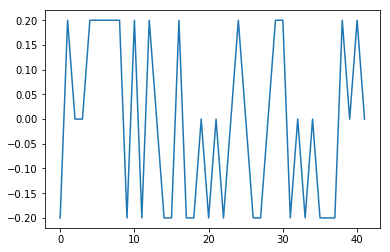

In [20]:
# Visualize labels
plt.plot(y_train)
plt.show()

Number of images: 3x8036 (center, left, right)


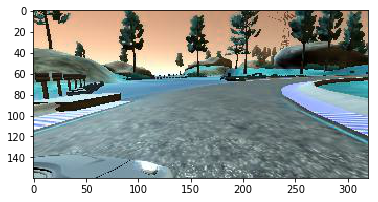

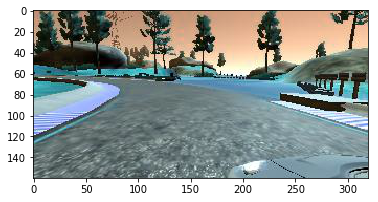

(32, 64, 3)


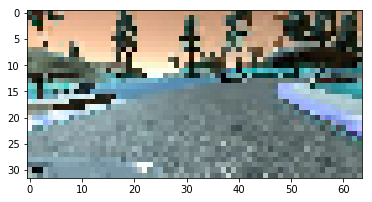

51200
2048
Ratio: 25.0


In [21]:
size_of = lambda x: x.shape[0] * x.shape[1] 
# Visualize random image
print("Number of images: 3x{} (center, left, right)".format(len(driving_log)))

img = X_train[0,::]
plt.imshow(img)
plt.show()
plt.imshow(np.fliplr(img))
plt.show()


r   = 100.0 / img.shape[1]
dim = (100, int(img.shape[0] * r))
dim = (64, 32)
# perform the actual resizing of the image and show it
resized = cv2.resize(img, dim, interpolation=cv2.INTER_CUBIC)
print(resized.shape)
plt.imshow(resized)
plt.show()
print(size_of(img))
print(size_of(resized))
print("Ratio: {}".format((size_of(img)/size_of(resized))))

#### Implementation of Inception Network ???  [Inception Network ??? Paper](http://arxiv.org/pdf/1602.07261v1.pdf) in Keras.


In [22]:
from keras.layers import concatenate

def conv_block(x, nb_filters, kernel_size=(3,3), strides=1):

    x1 = Convolution2D(nb_filters, kernel_size, strides=strides, padding='same')(x)
    #x1 = BatchNormalization()(x1)
    x1 = Activation('relu')(x1)
    
    return x1

def res_conv_block(x, kernel_size=(3,3)):
    nb_filters = keras.backend.int_shape(x)[3]
    x1 = Convolution2D(nb_filters, kernel_size=(1,1), padding='same')(x)
    x1 = Convolution2D(nb_filters, kernel_size, padding='same')(x1)
    #x1 = BatchNormalization()(x1)
    out = add([x, x1])
    
    return Activation('relu')(out)

def inception_A(x):
    nb_filters1 = 32
    nb_filters2 = keras.backend.int_shape(x)[3]
    
    x1 = Convolution2D(nb_filters1, kernel_size=(1,1), padding='same')(x)
    
    x2 = Convolution2D(nb_filters1, kernel_size=(1,1), padding='same')(x)
    x2 = Convolution2D(nb_filters1, kernel_size=(3,3), padding='same')(x2)
    
    x3 = Convolution2D(nb_filters1, kernel_size=(1,1), padding='same')(x)
    x3 = Convolution2D(nb_filters1, kernel_size=(3,3), padding='same')(x3)
    x3 = Convolution2D(nb_filters1, kernel_size=(3,3), padding='same')(x3)
    
    x123 = concatenate([x1, x2, x3])
    x123 = Convolution2D(nb_filters2, kernel_size=(1,1), padding='same')(x123)
    
    out = add([x, x123])
    return Activation('relu')(out)

def reduction_A(x, filter_bank={'k':192,'l':224,'m':256,'n':384}):
    x1 = Convolution2D(filter_bank['k'], kernel_size=(1,1), padding='same')(x)
    x1 = Convolution2D(filter_bank['l'], kernel_size=(3,3), padding='same')(x1)
    x1 = Convolution2D(filter_bank['m'], kernel_size=(3,3), padding='same', strides=2)(x1)
    
    x2 = Convolution2D(filter_bank['n'], kernel_size=(3,3), padding='same', strides=2)(x)
    
    x3 = MaxPool2D(strides=2)(x)
    
    return concatenate([x1, x2, x3])    

In [23]:
init = Input((160, 320, 3))
x      = conv_block(init, 32)
x      = res_conv_block(x)
x      = conv_block(x, 64)
x      = inception_A(x)
x      = reduction_A(x, filter_bank={'k':24,'l':32,'m':48,'n':64})
x      = conv_block(x, 32, strides=2)
x      = conv_block(x, 32, strides=2)
x      = conv_block(x, 32, strides=2)
x      = conv_block(x, 32, strides=2)
x      = Flatten()(x)
x      = Dense(activation='relu', units=10)(x)
out    = Dense(units=1, use_bias=True)(x)
model1 = Model(init, out, name='Inception-v4')
model1.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_1 (InputLayer)             (None, 160, 320, 3)   0                                            
____________________________________________________________________________________________________
conv2d_1 (Conv2D)                (None, 160, 320, 32)  896                                          
____________________________________________________________________________________________________
activation_1 (Activation)        (None, 160, 320, 32)  0                                            
____________________________________________________________________________________________________
conv2d_2 (Conv2D)                (None, 160, 320, 32)  1056                                         
___________________________________________________________________________________________

In [ ]:
now = datetime.datetime.now
batch_size = 3
epochs = 1

model1.compile(loss='mse',
              optimizer='adadelta',
              metrics=['accuracy'])

t = now()
model1.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, y_test))
print('Training time: %s' % (now() - t))
score = model1.evaluate(X_test, y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])